# 10-1. 들어가며(Missing Data)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
trade = pd.read_csv("trade.csv")
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


# 10-2. 결측치(Missing Data)

* 결측치 처리 방법
1. 결측치 있는 데이터 제거
2. 결측치를 다른 값으로 대체

In [19]:
print('전체 데이터 수: ', len(trade))

전체 데이터 수:  199


In [20]:
print('컬럼별 결측치 개수: ')
print(len(trade) - trade.count())

컬럼별 결측치 개수: 
기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64


- '기타사항'은 모두 결측치임을 확인할 수 있다.
- 아무 정보가 없는 컬럼이므로 삭제하자

In [21]:
# 결측치 있는 컬럼 삭제
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [22]:
# isnull(): 데이터마다 결측치 여부를 True, False로 반환

trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [23]:
# 행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반환

trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [24]:
# 값이 True인 데이터만 추출해주기
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


- index 191: 결측치를 삭제하는 것보다는 다른 값으로 대체하자
- 나머지: 제거하는 것이 바람직

In [34]:
# dropna: 결측치 삭제
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

# subset: 특정 컬럼 선택
# how - all: 컬럼 전부가 결측치인 행을 삭제하겠다
    # any: 하나라도 결측치면 삭제하겠t다
# inplace: 데이터프레임 내부에 바로 적용시킴

In [35]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


* 수치형 데이터 보완하기 (index 191)
1. 특정 값 지정
    - 결측치가 많은 경우 같은 값으로 대체된다면 데이터 분산이 실제보다 작아지는 문제
2. 평균, 중앙값으로 대체
    - 1번과 같은 문제
3. 다른 데이터를 이용해 예측값으로 대체
4. 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치 대체
    - ex) 기온 측정 결측치 -> 전후 데이터의 평균으로 보완

In [33]:
# 위의 4번 방법을 통해 보완하기
trade.loc[[188, 191, 194]]

# [[]]: 해당 row 반환

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [37]:
# '수출금액': 이전달, 다음달의 평균으로 채우기
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액']) / 2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [38]:
# '무역수지': 수출금액 - 수입금액
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액']
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


* 수치형 데이터일 때는 결측치를 삭제하거나 대체함
* 범주형 데이터의 경우는?
1. 특정 값 지정 ex. '기타', '결측'
2. 최빈값 등으로 대체
3. 다른 데이터를 이용해 예측값으로 대체
4. 시계열 데이터인 경우 앞뒤 데이터를 통해 결측치 대체

# 10-3. 중복된 데이터
- 같은 값을 가진 데이터 없이 행(row)별로 값이 유일해야 한다면?
    - -> 중복된 데이터 제거해야 함

In [41]:
# duplicated(): 중복된 데이터 여부 반환
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [42]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [43]:
trade[(trade['기간'] == '2020년 03월') & (trade['국가명'] == '중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


- index 186, 187이 중복되어 있다.

In [44]:
# drop_duplicateds: 중복된 데이터 삭제
trade.drop_duplicates(inplace=True)

index 187이 삭제됨을 알 수 있다.

In [58]:
df = pd.DataFrame({'id': ['001', '002', '003', '004', '002'],
                  'name': ['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


id가 002인 데이터 2개 존재
- id가 사람마다 unique하다고 할 때, 둘 중 하나는 삭제해야 함

index가 클수록 나중에 들어온 데이터이고, 사용자가 이름을 수정했을 때 업데이트가 되지 않고 삽입이 되어 생긴 문제라고 가정
- id가 중복된 경우 맨 나중에 들어온 값만 남기자

In [59]:
# keep='last'
df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


# 10-4. 이상치(Outlier)
- 이상치: 대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값


* Miin-Max Scaling
    - 대부분은 0에 가깝고 이상치만 1에 가까운 값을 가질 것
    - 이렇게 몇 개의 이사잋 때문에 대부분 값의 차이는 의미가 거의 없어짐

## z-score

* z-score : 평균과 표준편차 이용하기
    - z-score가 특정 기준 넘는다면 이상치라고 판단
    

* 이상치를 판단한 뒤에는?
1. 간단하게 이상치 삭제
2. 이상치를 다른 값으로 대체
3. 결측치와 마찬가지로 다른 데이터를 활용해 예측 모델 만들어 예측값을 활용
4. binning을 통해 수치형 데이터를 범주형으로 바꿈

In [60]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index

In [61]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [62]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [63]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


- 무역수지 이상치를 확인하는데 기준되는 값이 클수록 이상치가 적어진다는 것을 알 수 있음

In [65]:
# 무역수지가 이상치가 갑싱 아닌 데이터만 추출하기
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) <= z].index

In [66]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


## IQR Method

In [68]:
np.random.seed(2020)
data = np.random.randn(100) # 평균 0, 표편 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5]))) # [8,10,-3,-5])를 데이터 뒤에 추가
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

- seed: 유사 난수 생성기 '시드'
- random seed가 리셋되지 않으면, 매번 다른 수가 나온다!
- np.random.rand: 0~1 균일 분포에서 난수 matrix 생성
- np.random.randn: 가우시안 표준 정규 분포에서 난수 matrix 생성

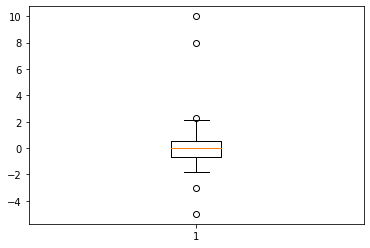

In [69]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

- 위 박스 플롯에서 박스를 벗어난 점들!
* IQR을 통해 이상치 찾아내기
    - IQR = (제 3분위수) - (제 1분위수) = 데이터의 중간 50% 범위
    - Q1-1.5*IQR 보다 왼쪽에 있거나, Q3+1.5*IQR보다 오른쪽에 있는 경우 이상치라 판단

In [70]:
# 제1사분위수, 제3사분위수 구하기
Q3, Q1 = np.percentile(data, [75, 25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [71]:
# 이상치 확인하기
data[(Q1-1.5*IQR > data) | (Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [72]:
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr) | (df[col] > q3+1.5*iqr)]

outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


# 10-5. 정규화(Normalization)
- 수입건수, 수출건수, 수입금액, 수출금액, 무역수지는 단위가 다르다.
- 스케일 차이가 크게 나는 데이터를 입력하면 머신런이 모델 학습에 문제가 발생할 수 있다.

## Standardization
- 데이터의 평균은 0, 분산은 1로 변환
- (X-평균)/(표준편차)


## Min-Max Scaling
- 데이터의 최솟값은 0, 최댓값은 1로 변환
- (X-min) / (max-min)

### 예시

In [78]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성함
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,5.139273,-0.187572
1,8.380663,-0.677416
2,11.326363,-0.405260
3,8.578085,-1.734884
4,4.683964,-1.647385
...,...,...
95,7.844331,-1.326395
96,3.571355,-1.965851
97,12.201735,-0.347464
98,11.164715,0.165097


In [79]:
# Standardization
x_standardization = (x - x.mean()) / x.std()
x_standardization

,A,B
0,0.166584,0.926245
1,0.994132,0.445252
2,1.746189,0.712491
3,1.044536,-0.593107
4,0.050340,-0.507189
...,...,...
95,0.857203,-0.191999
96,-0.233716,-0.819901
97,1.969678,0.769242
98,1.704919,1.272541


In [80]:
# Min-Max Scaling
x_min_max = (x-x.min()) / (x.max()-x.min())
x_min_max

,A,B
0,0.555051,0.704977
1,0.717568,0.612555
2,0.865260,0.663905
3,0.727466,0.413036
4,0.532223,0.429545
...,...,...
95,0.690677,0.490108
96,0.476439,0.369458
97,0.909149,0.674809
98,0.857155,0.771518


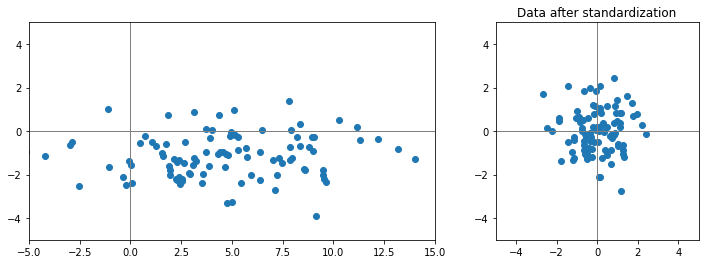

In [92]:
# Standardization 정규화 -> 분포 확인
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={
    'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

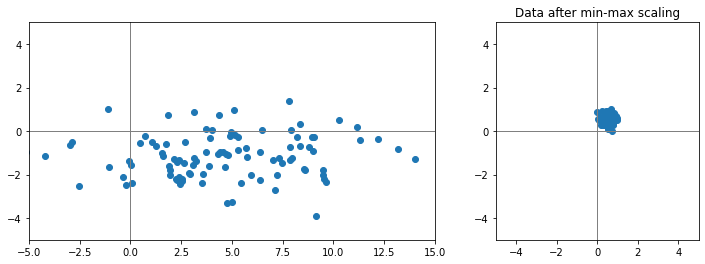

In [93]:
# Min-Max Scaling 정규화 -> 분포 확인
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={
    'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

### 우리가 가진 trade 데이터

In [97]:
# Standardization

# trade 데이터를 Standardization 기법으로 정규화함
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization = (trade[cols]-trade[cols].mean()) / trade[cols].std()
trade_Standardization.head()


,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [98]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,3.074464e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


- 각 컬럼의 평균은 거의 0에 가깝고, 표준편차는 1에 가까운 것을 확인할 수 있음

In [99]:
# Min-Max Scaling

# trade 데이터를 min-max scaling 기법으로 정규화
trade[cols] = (trade[cols]-trade[cols].min()) / (trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [100]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


** train데이터와 test 데이터가 나뉜 경우, train 데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화 시켜줘야 함

In [104]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

In [105]:
train_min = train.min()
train_max = train.max()

train_min_max = (train-train_min) / (train_max-train_min)
test_min_max = (test-train_min) / (train_max-train_min)

# test를 min-max scaling할 때도 train 정규화 기준으로 수행

In [106]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [107]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


In [115]:
# scikit-learn의 StandardScaler, MinMaxScaler 이용하기
from sklearn.preprocessing import MinMaxScaler

train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()

In [116]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [117]:
scaler.transform(test)

array([[-0.25,  0.55]])

# 10-6. 원-핫 인코딩 (One-Hot Encoding)
: 카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법

In [120]:
# get_dummies 함수로 쉽게 원-핫 인코딩 수행 가능

# trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [121]:
# pd.concat으로 trade와 country 합쳐주기
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


- axis=1 : 열
- axis=0 : 행

In [122]:
# 필요 없어진 국가명 컬럼 삭제해주기
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


# 10-7. 구간화(Binning)

- 구간화: 데이터를 구간별로 나누기
- 히스토그램과 같이 연속적인 데이터를 구간을 나눠 분석할 대 사용하는 방법

In [123]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

<AxesSubplot:>

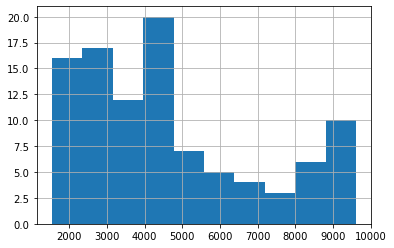

In [124]:
salary.hist()

- pandas의 cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형시키기

In [125]:
# 먼저 구간 정해주기
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [127]:
# cut 함수에 데이터와 구간을 입력 -> 데이터를 구간별로 나눠줌
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [131]:
print('salary[0]: ', salary[0])
print('salary[0]이 속한 카테고리: ', ctg[0])

salary[0]:  4300
salary[0]이 속한 카테고리:  (4000, 6000]


In [134]:
# value_counts(): 구간 별로 값이 몇 개가 속해있는지
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [136]:
# 구간의 개수 지정해줄 수도 있음
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [137]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

In [138]:
# qcut: 구간 일정하게 나누는 것이 x, 데이터의 분포를 비슷한 크기의 그룹으로 나눠줌
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [139]:
print(ctg.value_counts().sort_index())
print('.\n.\n Well done')

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64
.
.
 Well done
